In [1]:
import matplotlib.patches as patches
import spatialdata as sd
from matplotlib import pyplot as plt
import spatialdata_plot  # noqa: F401

from napari_spatialdata import Interactive
plt.style.use("dark_background")

/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
sdata = sd.read_zarr("visium_brain.zarr")
sdata

/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/var/folders/br/wg7_xdjd56j7rb8h39m_2f240000gn/T/ipykernel_65255/4158883396.py:1: DeprecationWarning: Table group found in zarr store at location /Users/kevin/Documents/Summer2025/visium_brain.zarr. Please update the zarr store to use tables instead.
  sdata = sd.read_zarr("visium_brain.zarr")
/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SpatialData object, with associated Zarr store: /Users/kevin/Documents/Summer2025/visium_brain.zarr
├── Images
│     ├── 'ST8059048_hires_image': DataArray[cyx] (3, 2000, 1969)
│     ├── 'ST8059048_lowres_image': DataArray[cyx] (3, 600, 591)
│     ├── 'ST8059050_hires_image': DataArray[cyx] (3, 2000, 1968)
│     ├── 'ST8059050_image': DataArray[cyx] (3, 2000, 1968)
│     ├── 'ST8059050_lowres_image': DataArray[cyx] (3, 600, 590)
│     └── 'ST8059052_image': DataArray[cyx] (3, 2000, 1950)
├── Shapes
│     ├── 'ST8059048': GeoDataFrame shape: (2987, 2) (2D shapes)
│     ├── 'ST8059050': GeoDataFrame shape: (3497, 2) (2D shapes)
│     ├── 'ST8059050_shapes': GeoDataFrame shape: (3497, 2) (2D shapes)
│     └── 'ST8059052_shapes': GeoDataFrame shape: (2576, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (6484, 31053)
with coordinate systems:
    ▸ 'ST8059048', with elements:
        ST8059048_hires_image (Images), ST8059048 (Shapes)
    ▸ 'ST8059050', with elements:
        ST8059050_

/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'ST8059048', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'ST8059050', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'ST8059050', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'ST8059048', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/miniconda3/envs/Summer2025/lib/python3.12/site-

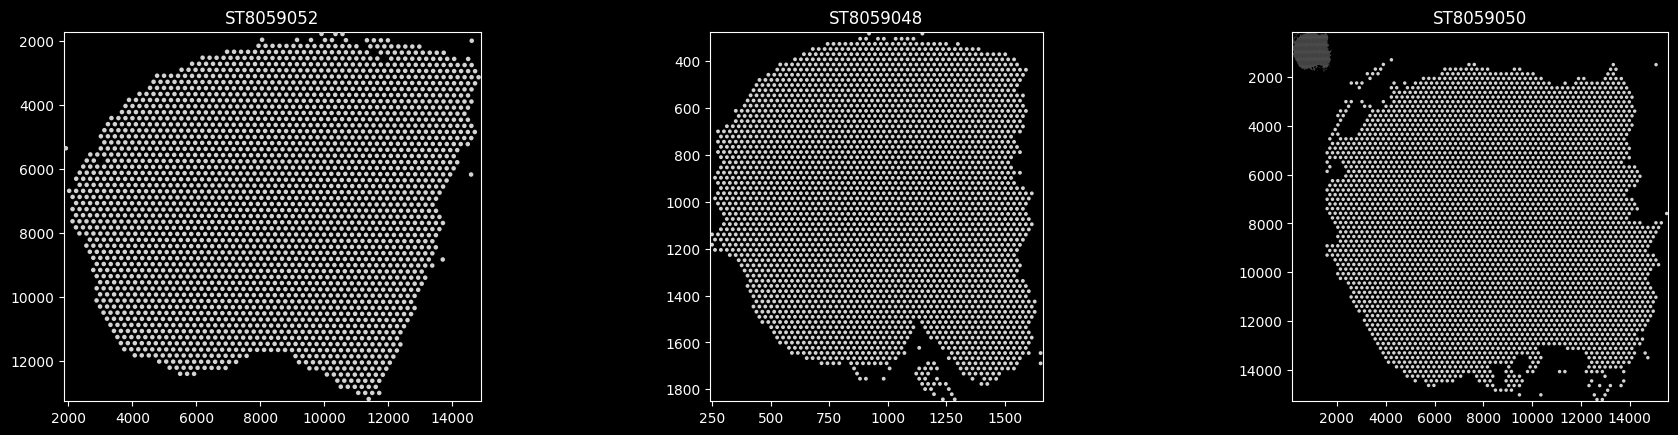

In [3]:
sdata.pl.render_shapes().pl.show()


/var/folders/br/wg7_xdjd56j7rb8h39m_2f240000gn/T/ipykernel_65255/2359278243.py:4: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata_ST8059050.pl.render_shapes(elements="ST8059050").pl.show(ax=ax)


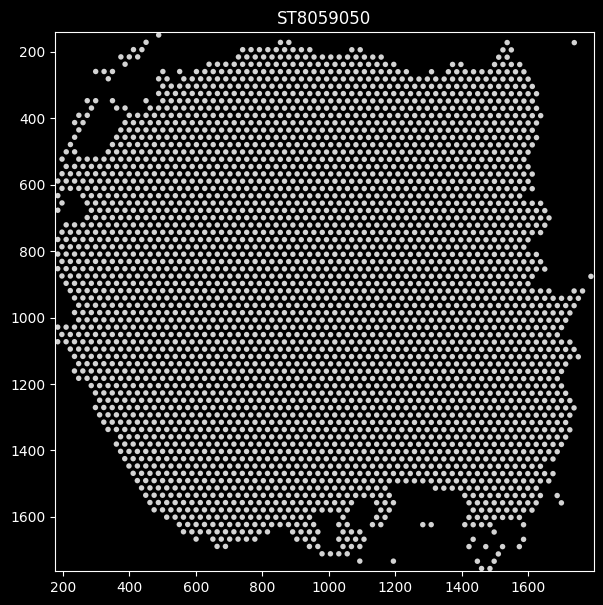

In [4]:
sdata_ST8059050 = sdata.filter_by_coordinate_system("ST8059050")

f, ax = plt.subplots(figsize=(7, 7))
sdata_ST8059050.pl.render_shapes(elements="ST8059050").pl.show(ax=ax)

/var/folders/br/wg7_xdjd56j7rb8h39m_2f240000gn/T/ipykernel_65255/2971821421.py:9: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata_ST8059050.pl.render_shapes(elements="ST8059050").pl.show(ax=ax)


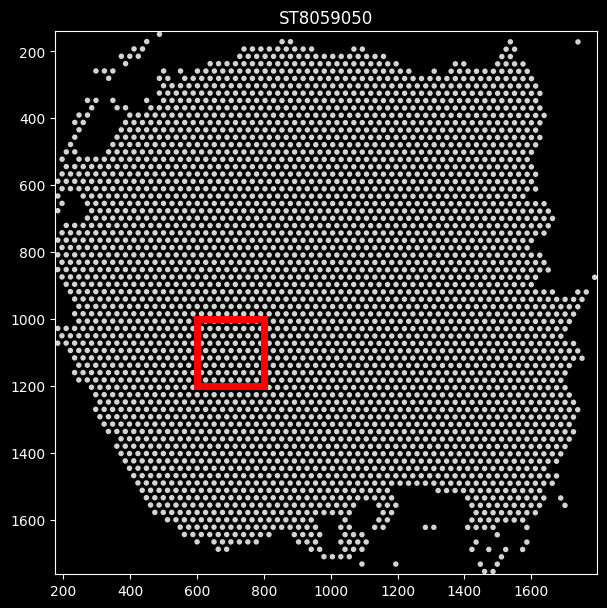

In [5]:
bb_xmin = 600
bb_ymin = 1000
bb_w = 200
bb_h = 200
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

f, ax = plt.subplots(figsize=(7, 77))
sdata_ST8059050.pl.render_shapes(elements="ST8059050").pl.show(ax=ax)
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)

In [7]:
cropped_sdata = sdata_ST8059050.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="ST8059050",
)

cropped_sdata

SpatialData object
├── Images
│     ├── 'ST8059050_hires_image': DataArray[cyx] (3, 200, 200)
│     └── 'ST8059050_image': DataArray[cyx] (3, 23, 23)
├── Shapes
│     └── 'ST8059050': GeoDataFrame shape: (72, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (72, 31053)
with coordinate systems:
    ▸ 'ST8059050', with elements:
        ST8059050_hires_image (Images), ST8059050_image (Images), ST8059050 (Shapes)

/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `ST8059050` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


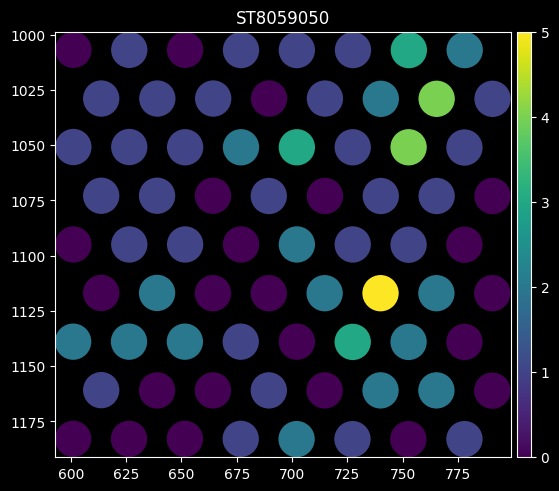

In [8]:
cropped_sdata.pl.render_shapes(color="Sox2").pl.show()


In [10]:
# query for polygons, not just boxes

from spatialdata import polygon_query
from shapely import Polygon

polygon = Polygon(
    [
        (200, 200),
        (450, 600),
        (450, 350),
        (900, 1000),
        (1200, 600),
    ]
)
cropped_sdata2 = polygon_query(
    sdata_ST8059050,
    polygon=polygon,
    target_coordinate_system="ST8059050",
)

cropped_sdata2

SpatialData object
├── Images
│     ├── 'ST8059050_hires_image': DataArray[cyx] (3, 800, 1000)
│     └── 'ST8059050_image': DataArray[cyx] (3, 92, 115)
├── Shapes
│     └── 'ST8059050': GeoDataFrame shape: (435, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (435, 31053)
with coordinate systems:
    ▸ 'ST8059050', with elements:
        ST8059050_hires_image (Images), ST8059050_image (Images), ST8059050 (Shapes)

/var/folders/br/wg7_xdjd56j7rb8h39m_2f240000gn/T/ipykernel_65255/1518987010.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata_ST8059050.pl.render_shapes(elements="ST8059050", cmap="Pastel1").pl.show(ax=ax)
/var/folders/br/wg7_xdjd56j7rb8h39m_2f240000gn/T/ipykernel_65255/1518987010.py:4: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  cropped_sdata.pl.render_images(elements="ST8059050_hires_image").pl.show(ax=ax)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03153153..1.018018].
/var/folders/br/wg7_xdjd56j7rb8h39m_2f240000gn/T/ipykernel_65255/1518987010.py:5: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAcces

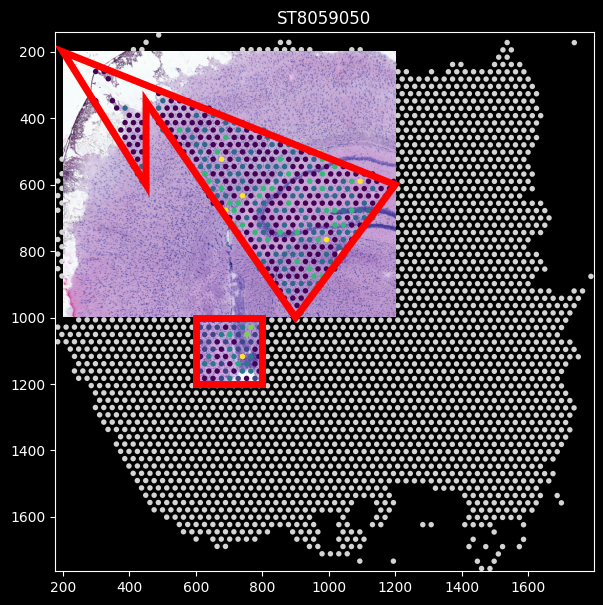

In [12]:
f, ax = plt.subplots(figsize=(7, 7))
sdata_ST8059050.pl.render_shapes(elements="ST8059050", cmap="Pastel1").pl.show(ax=ax)

cropped_sdata.pl.render_images(elements="ST8059050_hires_image").pl.show(ax=ax)
cropped_sdata2.pl.render_images(elements="ST8059050_hires_image").pl.show(ax=ax)

cropped_sdata.pl.render_shapes(color="Sox2").pl.show(ax=ax, colorbar=False)
cropped_sdata2.pl.render_shapes(color="Sox2").pl.show(ax=ax, colorbar=False)

# show the bounding box and the polygons used for the queries
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
poly_patch = patches.Polygon(list(polygon.exterior.coords), linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)
ax.add_patch(poly_patch)